<a href="https://colab.research.google.com/github/yellayujin/mulcamp34/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

궁금한 것:
- sm.OLS와 smf.ols의 기본적인 세팅에 대한 결과는 동일한가?
=> ㅇㅇ
- 더미변수화 진행하고 회귀 돌린 것과 더미변수화하지 않고 C()안에 넣어 (=drop_first한 것) 회귀 돌린 것은 결과 동일할까?

- LinearRegression과 OLS, ols 비교
  - 스케일링을 더미변수 만들기 전에 해야하나?
    아니라면, 더미변수를 먼저 만들고 스케일링하면 0이나 1외의 값으로 되나?
    => 보존됨
  => 문자형 자료는 스케일링 안 됨(빼고 하거나, 더미변수화 하고 하거나)


궁금한 것 해결을 위해 할 것:
- 데이터셋 X, y로 분리한 것과 열추출한 것 구분
- 더미변수화한 것 안 한 것 구분
- 각 모델 구분

회귀분석 위해 할 것
- 데이터 전처리
  - 스케일 정리
  - 더미변수화
  - Train_test는 일단 귀찮으니 패스

- 회귀분석
  - 회귀분석 가정 만족 여부 확인
  - 다중공선성 확인
  - df_dm_sc와 df_sc ols 동일 여부 확인
  - OLS와 ols 확인(디폴트 옵션)
  

In [24]:
# 데이터셋 고르기
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [25]:
# 연속형 변수가 많을 것으로 생각되는 mpg로 선정
raw = sns.load_dataset('mpg')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [26]:
# 결측값 제거
raw.dropna(subset='horsepower', axis=0, inplace=True)
raw.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [27]:
# 데이터 간단히 살펴보기
raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
raw.drop('name', axis=1, inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [29]:
raw.describe()     # 스케일 차이 큼

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [50]:
raw['origin'].value_counts()   # 고윳값 종류와 갯수 출력

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [49]:
raw['origin'].unique()      # 고윳값 종류 출력

array(['usa', 'japan', 'europe'], dtype=object)

In [41]:
# 더미변수 생성
import pandas as pd
df_dm = pd.get_dummies(raw, columns = ['origin'], drop_first=True)   # 모두 0이면 europe

In [42]:
df_dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin_japan  392 non-null    uint8  
 8   origin_usa    392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 25.3 KB


In [51]:
# 더미변수 후 스케일링해보기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_dm)
df_dm_sc = scaler.transform(df_dm)

df_dm_sc = pd.DataFrame(df_dm_sc)
df_dm_sc                             # 근데 컬럼명 왜 다 초기화됨?

,0,1,2,3,4,5,6,7,8
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,1.0


In [81]:
# 컬럼명 붙이기
df_dm_sc.columns = df_dm.columns
df_dm_sc.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.0


In [94]:
scaler1 = MinMaxScaler()

scaler1.fit(df.drop(['name','origin'], axis=1))
df_sc = scaler1.transform(df.drop(['name','origin'], axis=1))

df_sc = pd.DataFrame(df_sc)

df_sc.columns = df.drop(['name','origin'], axis=1).columns
df_sc.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0


In [95]:
df_sc['origin'] = raw['origin']
df_sc.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,usa
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,usa
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,usa


In [96]:
# 독립, 종속 지정
# 종속: mpg
# 독립: 다해보자

y = df_dm_sc['mpg']
X = df_dm_sc.drop('mpg', axis=1)

<Axes: >

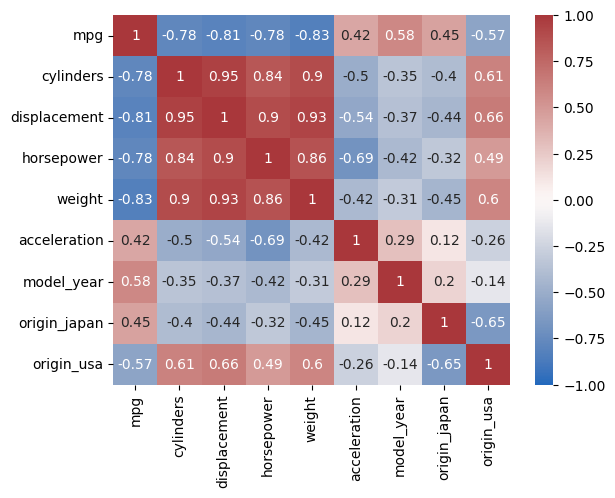

In [97]:
# 상관관계 확인
corr = df_dm_sc.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap='vlag', annot=True)
# 일부 독립변수들 사이에서 다중공선성 예상됨

In [98]:
# 상관계수와 유의확률 출력
# !pip install pingouin
import pingouin as pg
pg.rcorr(df_dm_sc, stars=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
mpg,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
cylinders,-0.778,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000
displacement,-0.805,0.951,-,0.000,0.000,0.000,0.000,0.000,0.000
horsepower,-0.778,0.843,0.897,-,0.000,0.000,0.000,0.000,0.000
weight,-0.832,0.898,0.933,0.865,-,0.000,0.000,0.000,0.000
acceleration,0.423,-0.505,-0.544,-0.689,-0.417,-,0.000,0.023,0.000
model_year,0.581,-0.346,-0.37,-0.416,-0.309,0.29,-,0.000,0.007
origin_japan,0.451,-0.404,-0.441,-0.322,-0.448,0.115,0.2,-,0.000
origin_usa,-0.565,0.61,0.656,0.49,0.601,-0.258,-0.136,-0.649,-


In [99]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
print(vif)

   VIF Factor      variable
0   32.298865     cylinders
1   55.388932  displacement
2   17.964767    horsepower
3   36.779187        weight
4    6.570938  acceleration
5    4.187734    model_year
6    2.204976  origin_japan
7    6.822595    origin_usa


In [100]:
# displacement 제거
X_1 = X.drop('displacement', axis=1)
vif1 = pd.DataFrame()
vif1['VIF Factor'] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif1['variable'] = X_1.columns
print(vif1)

   VIF Factor      variable
0   19.153140     cylinders
1   16.625087    horsepower
2   28.832275        weight
3    5.509548  acceleration
4    4.068473    model_year
5    2.204759  origin_japan
6    6.115337    origin_usa


In [101]:
# weight 제거
X_2 = X_1.drop('weight', axis=1)
vif2 = pd.DataFrame()
vif2['VIF Factor'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif2['variable'] = X_2.columns
print(vif2)

   VIF Factor      variable
0   13.227494     cylinders
1   11.055716    horsepower
2    4.832390  acceleration
3    4.062897    model_year
4    2.034837  origin_japan
5    6.115151    origin_usa


In [102]:
# cylinders 제거
X_3 = X_2.drop('cylinders', axis=1)
vif3 = pd.DataFrame()
vif3['VIF Factor'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif3['variable'] = X_3.columns
print(vif3)    # X_3으로 진행

   VIF Factor      variable
0    3.716226    horsepower
1    4.764445  acceleration
2    4.043216    model_year
3    2.033116  origin_japan
4    5.455623    origin_usa


In [103]:
# 회귀분석 가정 확인


In [108]:
# 다중선형회귀분석
# way1 df_dm_sc이용, ols
import statsmodels.formula.api as smf

model1 = smf.ols(formula = 'mpg ~ horsepower + acceleration + model_year + origin_japan + origin_usa', data = df_dm_sc).fit()      # formula='y ~ X'
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     244.6
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          2.91e-117
Time:                        05:33:47   Log-Likelihood:                 340.42
No. Observations:                 392   AIC:                            -668.8
Df Residuals:                     386   BIC:                            -645.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6247      0.033     19.003   

In [111]:
# way2, df_dm_sc이용, OLS
import statsmodels.api as sm

X_ad = sm.add_constant(X_3)
model2 = sm.OLS(y, X_ad).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     244.6
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          2.91e-117
Time:                        05:34:47   Log-Likelihood:                 340.42
No. Observations:                 392   AIC:                            -668.8
Df Residuals:                     386   BIC:                            -645.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6247      0.033     19.003   

In [113]:
# way3, df_sc, ols
model3 = smf.ols(formula = 'mpg ~ horsepower + acceleration + model_year + C(origin)', data = df_sc).fit()     # 왜 다르지?..
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     191.5
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          1.74e-101
Time:                        05:36:20   Log-Likelihood:                 302.53
No. Observations:                 386   AIC:                            -593.1
Df Residuals:                     380   BIC:                            -569.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6663      0